**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [47]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

!pip install python-decouple
from decouple import config 
from sqlalchemy import create_engine, text

import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## 1.1: Create SQL Engine

In [49]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

## 1.2: Load Data in SQL (Kaggle)

In [50]:
kaggle_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
kaggle_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [51]:
# Load the Kaggle dataset into an SQL database
kaggle_df.to_sql('kaggle', con=engine, if_exists="replace")

2022-07-15 18:08:27,970 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2022-07-15 18:08:27,972 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:27,977 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2022-07-15 18:08:27,981 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:27,984 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-07-15 18:08:27,986 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:27,989 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2022-07-15 18:08:27,991 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:27,997 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-07-15 18:08:28,000 INFO sqlalchemy.engine.Engine [raw sql] ('kaggle',)
2022-07-15 18:08:28,003 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("kaggle")
2022

## 1.2: Load Data in SQL (Airbnb)

In [52]:
# Load the AirBnB dataset with interesting columns
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)
airbnb_df[:3]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [53]:
# Load the AirBnB dataset into an SQL database
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2022-07-15 18:08:38,385 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-07-15 18:08:38,389 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:38,395 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-07-15 18:08:38,398 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:38,402 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-07-15 18:08:38,405 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:38,415 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-07-15 18:08:38,424 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:38,432 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-07-15 18:08:38,434 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)
2022-07-15 18:08:38,439 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb")
2022

## 1.3:  Count Entries in SQL (per City)

In [54]:
# Count total registries for each city (or council area) in kaggle table
kaggle_cities, kaggle_cities_count = [], []
query_councl = "SELECT CouncilArea, COUNT(1) FROM kaggle GROUP BY CouncilArea"
with engine.connect() as con:
  rs = con.execute(query_councl)
  for row in rs:
    # print(row)
    kaggle_cities.append(str(row[0]))
    kaggle_cities_count.append(int(row[1]))

2022-07-15 18:08:41,397 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(1) FROM kaggle GROUP BY CouncilArea
2022-07-15 18:08:41,406 INFO sqlalchemy.engine.Engine [raw sql] ()


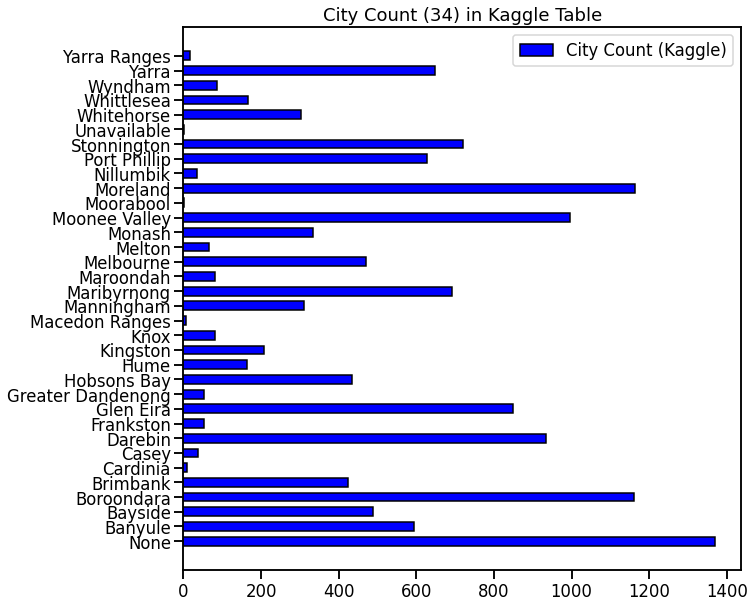

In [55]:
# Plot bar chart
plt.figure(figsize=(10, 10))
plt.title('City Count ({}) in Kaggle Table'.format(len(kaggle_cities)))
index = np.arange(len(kaggle_cities)) + 0.1
bar_width = 0.6
plt.barh(index, kaggle_cities_count, bar_width, left=0, color='blue', 
        edgecolor = 'black', label = "City Count (Kaggle)")
plt.yticks(index, kaggle_cities)
plt.legend()
plt.show()

In [56]:
# Count total registries for each  city (or council area) in airbnb table
query_city = "SELECT city, COUNT(1) FROM airbnb GROUP BY city"
airbnb_cities, airbnb_cities_count = [], []
with engine.connect() as con:
  rs = con.execute(query_city)
  for row in rs:
    airbnb_cities.append(str(row[0]))
    airbnb_cities_count.append(int(row[1]))
    #print(row)

2022-07-15 18:08:42,635 INFO sqlalchemy.engine.Engine SELECT city, COUNT(1) FROM airbnb GROUP BY city
2022-07-15 18:08:42,640 INFO sqlalchemy.engine.Engine [raw sql] ()


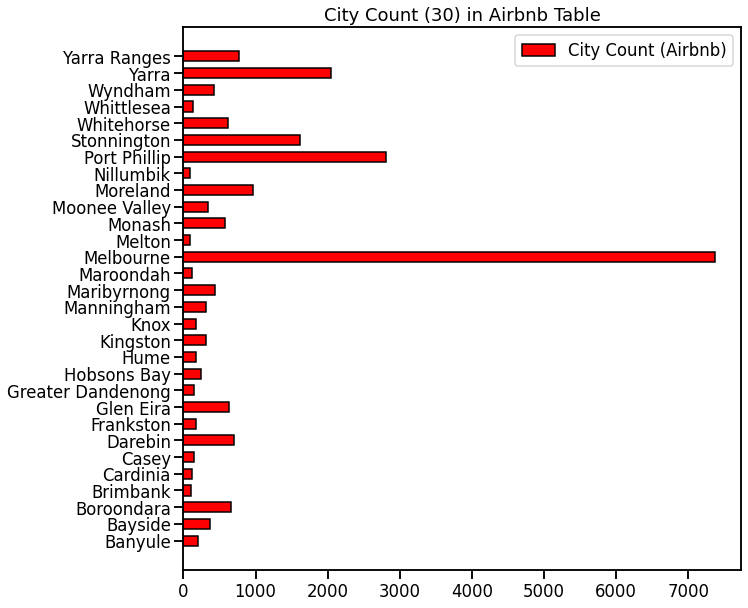

In [57]:
# Plot bar chart
plt.figure(figsize=(10, 10))
plt.title('City Count ({}) in Airbnb Table'.format(len(airbnb_cities)))
index = np.arange(len(airbnb_cities)) + 0.1
bar_width = 0.6
plt.barh(index, airbnb_cities_count, bar_width, left=0, color='red', 
        edgecolor = 'black', label = "City Count (Airbnb)")
plt.yticks(index, airbnb_cities)
plt.legend()
plt.show()

## 1.3:  Count Entries in SQL (per Neigh.)

In [58]:
# Count total registries for each suburb (or neighborhood) in melbourne table
query_suburb = "SELECT Suburb, COUNT(1) FROM kaggle GROUP BY Suburb"
kaggle_neighborhood, kaggle_neighborhood_count = [], []
with engine.connect() as con:
  rs = con.execute(query_suburb)
  for row in rs:
    kaggle_neighborhood.append(str(row[0]))
    kaggle_neighborhood_count.append(int(row[1]))
    #print(row)

2022-07-15 18:08:43,662 INFO sqlalchemy.engine.Engine SELECT Suburb, COUNT(1) FROM kaggle GROUP BY Suburb
2022-07-15 18:08:43,664 INFO sqlalchemy.engine.Engine [raw sql] ()


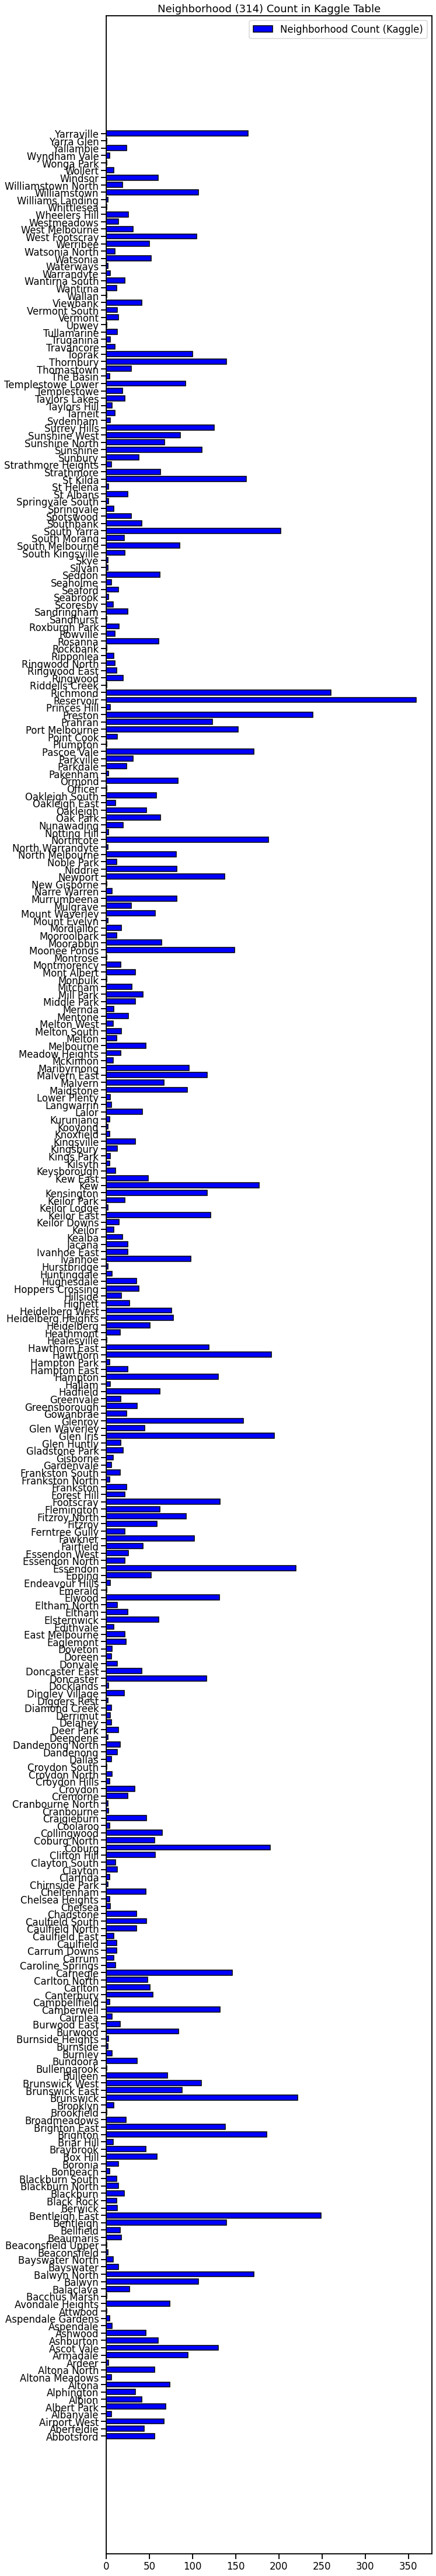

In [59]:
# Plot bar chart
plt.figure(figsize=(10, 80))
plt.title('Neighborhood ({}) Count in Kaggle Table'.format(len(kaggle_neighborhood)))
index = np.arange(len(kaggle_neighborhood))
bar_width = 0.7
plt.barh(index, kaggle_neighborhood_count, bar_width, left=0, color='blue', 
        edgecolor = 'black', label = "Neighborhood Count (Kaggle)")
plt.yticks(index, kaggle_neighborhood)
plt.legend()
plt.show()

In [60]:
# Count total registries for each suburb (or neighborhood) in airbnb table
query_neighb = "SELECT neighborhood, COUNT(1) FROM airbnb GROUP BY neighborhood"
airbnb_neighborhood, airbnb_neighborhood_count = [], []
with engine.connect() as con:
  rs = con.execute(query_neighb)
  for row in rs:
    airbnb_neighborhood.append(str(row[0]))
    airbnb_neighborhood_count.append(int(row[1]))
    #print(row)

2022-07-15 18:08:54,551 INFO sqlalchemy.engine.Engine SELECT neighborhood, COUNT(1) FROM airbnb GROUP BY neighborhood
2022-07-15 18:08:54,564 INFO sqlalchemy.engine.Engine [raw sql] ()


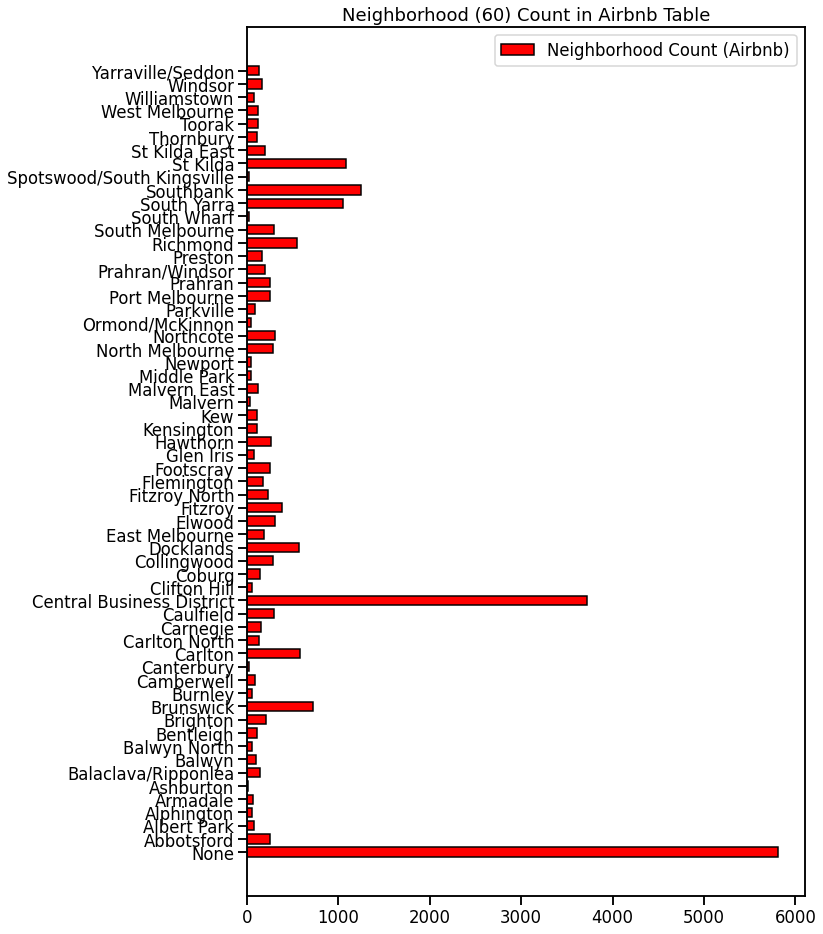

In [61]:
# Plot bar chart
plt.figure(figsize=(10, 16))
plt.title('Neighborhood ({}) Count in Airbnb Table'.format(len(airbnb_neighborhood)))
index = np.arange(len(airbnb_neighborhood))
bar_width = 0.7
plt.barh(index, airbnb_neighborhood_count, bar_width, left=0, color='red', 
        edgecolor = 'black', label = "Neighborhood Count (Airbnb)")
plt.yticks(index, airbnb_neighborhood)
plt.legend()
plt.show()

## 1.4: Fix Kaggle-Airbnb Zipcode Format

In [62]:
# SQL databases post/zip code formats:
# kaggle     	Postcode 	FLOAT	  example: 3067.0, 3067.0...
# airbnb 		  zipcode 	TEXT	  example: 3105, 3057...
print('Kaggle Postcode column type:', kaggle_df['Postcode'].dtypes)
print('Airbnb zipcode  column type:', airbnb_df['zipcode'].dtypes)

Kaggle Postcode column type: float64
Airbnb zipcode  column type: object


Necesitamos unificar los formatos de código postal de ambos data sets para que el comando JOIN de SQL pueda unir datos con el mismo tipo. Partimos de la base de que los códigos postales son números enteros, entonces decidimos modificar ambos datos para que sean de tipo INT.

In [63]:
# Convert postcode to int in Kaggle dataset
kaggle_df.Postcode = kaggle_df.Postcode.astype(int)
# Convert zipcode to int in Airbnb dataset
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df['zipcode'], errors='coerce')
airbnb_df = airbnb_df.dropna(subset=['zipcode'])
airbnb_df.zipcode = airbnb_df.zipcode.astype(int)
# Confirm result
print('Kaggle Postcode column type:', kaggle_df['Postcode'].dtypes)
print('Airbnb zipcode  column type:', airbnb_df['zipcode'].dtypes)

Kaggle Postcode column type: int64
Airbnb zipcode  column type: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [64]:
# Replace the Kaggle dataset into the SQL database (zipcode is BIGINT now)
kaggle_df.to_sql('kaggle', con=engine, if_exists="replace")

2022-07-15 18:08:56,822 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2022-07-15 18:08:56,824 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:56,828 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2022-07-15 18:08:56,831 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:56,833 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-07-15 18:08:56,840 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:56,845 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle")
2022-07-15 18:08:56,847 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:56,861 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-07-15 18:08:56,869 INFO sqlalchemy.engine.Engine [raw sql] ('kaggle',)
2022-07-15 18:08:56,876 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("kaggle")
2022

In [65]:
# Replace the AirBnB dataset into the SQL database (zipcode is BIGINT now)
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2022-07-15 18:08:57,835 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-07-15 18:08:57,839 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:57,845 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-07-15 18:08:57,846 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:57,850 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-07-15 18:08:57,852 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:57,854 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-07-15 18:08:57,856 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-07-15 18:08:57,861 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-07-15 18:08:57,863 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)
2022-07-15 18:08:57,866 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb")
2022

## 1.4: Merge Kaggle-Airbnb in SQL

Agregamos el promedio del precio en Airbnb a cada zipcode de Kaggle.

In [66]:
# https://towardsdatascience.com/merging-tables-using-sql-a2e60ff687e9
# Tables:   kaggle      airbnb
# Columns:  Postcode    zipcode

query_join ="SELECT * FROM kaggle t1 JOIN (SELECT zipcode, AVG(price) avg_price FROM airbnb GROUP BY zipcode) t2 ON t1.Postcode = t2.zipcode"

with engine.connect() as con:
  rs = con.execute(query_join)
  ### Ojo! Imprimir hace que tome mucho tiempo! ###
  for row in rs:
    print(row)
    break

2022-07-15 18:08:59,282 INFO sqlalchemy.engine.Engine SELECT * FROM kaggle t1 JOIN (SELECT zipcode, AVG(price) avg_price FROM airbnb GROUP BY zipcode) t2 ON t1.Postcode = t2.zipcode
2022-07-15 18:08:59,285 INFO sqlalchemy.engine.Engine [raw sql] ()
(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 3067, 130.62403100775194)


## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

##2.1: Seleccion de columnas

In [67]:
kaggle_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

In [68]:
# Print all columns
kaggle_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Recolectamos informacion de los datos sacada de: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot. Debajo listamos y describimos cada una de las variables y justificamos cuales removemos.

*   **Price**: Price in dollars <font color='blue'>(**Relevante**: Es nuestra variable de estudio.)</font>
*   **Suburb**: Neighborhood <font color='blue'>(**Relevante**: Creemos que el barrio es una variable relevante para el valor de la propiedad ya que barrios con mejor urbanización y servicios valorizan la misma.)</font>
*   **Address**: Location of the property <font color='red'>(**No Relevante**: Creemos que la dirección específica dentro del barrio o bien tiene poco impacto en el valor, o bien el impacto es muy granular e.g., una casa en frente de una plaza.)</font>
*   **Rooms**: Number of rooms <font color='blue'>(**Relevante**: Creemos que la cantidad de cuartos son indicación de la superficie cubierta de la propiedad y por ende afectan directamente su valor.)</font>
*   **Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. <font color='red'>(**No Relevante**: Creemos que el método con el cual se obtuvo el precio de la propiead es poco relevante en relación a los otros aspectos seleccionados.)</font>
*   **Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential. <font color='blue'>(**Relevante**: Creemos que el tipo de propiedad es clave para definir el precio, así como el uso que se le puede dar a la misma y las funcionalidades como terreza, etc.)</font>
*   **SellerG**: Real Estate Agent <font color='red'>(**No Relevante**: Creemos que, al igual que la variable method, el agente que gestionó la transacción tiene poca influencia en el precio.)</font>
*   **Date**: Date sold <font color='blue'>(**Relevante**: Creemos que la fecha de la venta es relevant tanto en cuanto a la estacionalidad anual como inter-anual.)</font>
*   **Distance**: Distance from CBD (Distancia al distrito financiero) <font color='blue'>(**Relevante**: Creemos que la distancia al centro es claramente un factor de valor de la propiedad, aunque en la realidad post-pandemia pase a ser menos relevante en algunos casos.)</font>
*   **Regionname**: General Region (West, North West, North, North east …etc) <font color='red'>(**No Relevante**: Creemos que el aspecto de regionalidad ya está cubierto con el dato del barrio, que es más detallado.)</font>
*   **Propertycount**: Number of properties that exist in the suburb <font color='red'>(**No Relevante**: Creemos que el tamaño de barrio no afecta necesariamente al valor de la propiedad, puede ser un barrio grande o chico tanto caro como barato.)</font>
*   **Bedroom2**: Scraped # of Bedrooms (from different source) <font color='blue'>(**Relevante**: Creemos que es una variable complementaria a la cantidad de cuartos indicada en la variable rooms. Incluso a igual rooms, más bedrroms derivará en un mayor valor para la propiedad.)</font>
*   **Bathroom**: Number of Bathrooms <font color='blue'>(**Relevante**: Creemos que es una variable complementaria a la cantidad de cuartos indicada en la variable rooms y bedrooms)</font>
*   **Car**: Number of carspots <font color='blue'>(**Relevante**: Creemos que a mayor espacio para automóviles más valor se le asigna a la propiedad, y posiblemente indique mayor superficie cubierta/utilizable.)</font>
*   **Landsize**: Land Size <font color='blue'>(**Relevante**: Creemos efectivamente el tamaño del terreno de la propiedad juega un rol fundamental en su valor.)</font>
*   **BuildingArea**: Building Size <font color='blue'>(**Relevante**: Creemos efectivamente el tamaño del terreno cubierto de la propiedad juega un rol fundamental en su valor.)</font>
*   **CouncilArea**: Governing council for the area <font color='red'>(**No Relevante**: Creemos que el factor de ubicación de la propiedad ya está cubierto con la variable de barrio.)</font>

In [69]:
# De acuerdo a lo indicado arriba, removimos:
# 'Address', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'CouncilArea'
kaggle = kaggle_df[['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 
                    'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                    'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude' ]]
kaggle[-3:]

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
13577,Williamstown,3,h,1170000.0,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738
13578,Williamstown,4,h,2500000.0,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299
13579,Yarraville,4,h,1285000.0,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,-37.81188,144.88449


##2.1: Eliminar Valores Extremos

In [70]:
# Imprimimos una descripcion para saber que limpiar
kaggle.describe()
# Parece que hay lugares con mas bedrooms que rooms que no tiene sentido
# Tambien hay lugares con landsize == 0
# Tambien parece que hay terrenos, porque buildingarea es 0
# Hay años de construccion que no tienen sentido
# Hay latitud y longitud que no tiene sentido
# Igualmente esto solo describe las columnas numericas, pueden pasar cosas raras en las categoricas

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350


In [71]:
#Hay muchos datos con Landsize nulo...
kaggle.Landsize.value_counts()

0.0       1939
650.0      103
697.0       71
700.0       48
585.0       47
          ... 
2879.0       1
2335.0       1
1669.0       1
6186.0       1
986.0        1
Name: Landsize, Length: 1448, dtype: int64

In [72]:
#Usamos all para que describa tambien las variables categoricas
kaggle.describe(include = 'all') 

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,13580,13580.000000,13580,1.358000e+04,13580,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000
unique,314,NaN,3,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Reservoir,NaN,h,NaN,27/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,359,NaN,9449,NaN,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.937997,NaN,1.075684e+06,NaN,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216
std,NaN,0.955748,NaN,6.393107e+05,NaN,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916
min,NaN,1.000000,NaN,8.500000e+04,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810
25%,NaN,2.000000,NaN,6.500000e+05,NaN,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600
50%,NaN,3.000000,NaN,9.030000e+05,NaN,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100
75%,NaN,3.000000,NaN,1.330000e+06,NaN,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305


In [73]:

def clean_outliers_max_q(dataset, column_name, quantile,  show=False):
    value = dataset[column_name].quantile(quantile)

    interesting_col = dataset[column_name]
    print(f"Columna {column_name}:")
    mask_outlier = (interesting_col <= (value))
    print(f"Maximo:{value}")
    mask_outlier = (mask_outlier) | (pd.isnull(interesting_col)) | (pd.isna(interesting_col))
    result = dataset[mask_outlier]
    
    print(f"\tSe eliminaron {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      seaborn.boxplot(dataset[column_name], ax=axes[0]).set_title("Original")
      seaborn.boxplot(result[column_name], ax=axes[1]).set_title(f"Tirando valores mayores al quantil {quantile}")

    return result

def clean_outliers_min_q(dataset, column_name, quantile,  show=False):

    value = dataset[column_name].quantile(quantile)

    interesting_col = dataset[column_name]
    print(f"Columna {column_name}:")
    mask_outlier = (interesting_col >= (value))
    print(f"Minimo:{value}")
    mask_outlier = (mask_outlier) | (pd.isnull(interesting_col)) | (pd.isna(interesting_col))
    result = dataset[mask_outlier]
    
    print(f"\tSe eliminaron {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      seaborn.boxplot(dataset[column_name], ax=axes[0]).set_title("Original")
      seaborn.boxplot(result[column_name], ax=axes[1]).set_title(f"Tirando valores menores al quantil {quantile}")

    return result

In [74]:
# Usamos la función clean outliers para remover valores extremos considerando
# los rangos quartílicos
def clean_outliers(dataset, column_name, upper=True, lower=True,  show=False, keep_nulls=True):
    """Returns dataset removing the outlier rows from column @column_name."""

    
    # Computing IQR
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1  
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    print(f"Columna {column_name}:")
    if upper and lower:
      mask_outlier = (interesting_col <= (Q3+1.5*IQR)) & (interesting_col >= (Q1-1.5*IQR))
      print(f"\tMinimo: {Q1-1.5*IQR}, Maximo:{Q3+1.5*IQR}")
    elif lower:
      mask_outlier = (interesting_col >= (Q1-1.5*IQR))
      print(f"\tMinimo: {Q1-1.5*IQR}")
    elif upper:
      mask_outlier = (interesting_col <= (Q3+1.5*IQR))
      print(f"\tMaximo:{Q3+1.5*IQR}")
    else:
      raise ValueError
    if keep_nulls:
      mask_outlier = (mask_outlier) | (pd.isnull(interesting_col)) | (pd.isna(interesting_col))
    result = dataset[mask_outlier]
    
    print(f"\tSe eliminaron {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      seaborn.boxplot(dataset[column_name], ax=axes[0]).set_title("Original")
      seaborn.boxplot(result[column_name], ax=axes[1]).set_title("Tirando valores extremos segun IQR")

    return result

Columna Price:
	Minimo: -370000.0, Maximo:2350000.0
	Se eliminaron 612 registros de 13580
Columna BuildingArea:
Maximo:419.0
	Se eliminaron 67 registros de 12968
Columna Landsize:
Maximo:3014.0
	Se eliminaron 128 registros de 12901


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

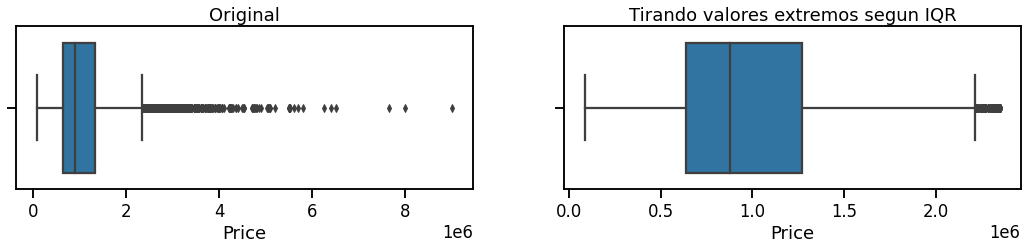

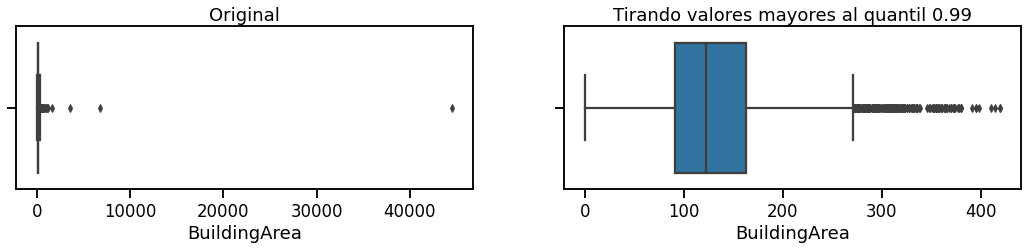

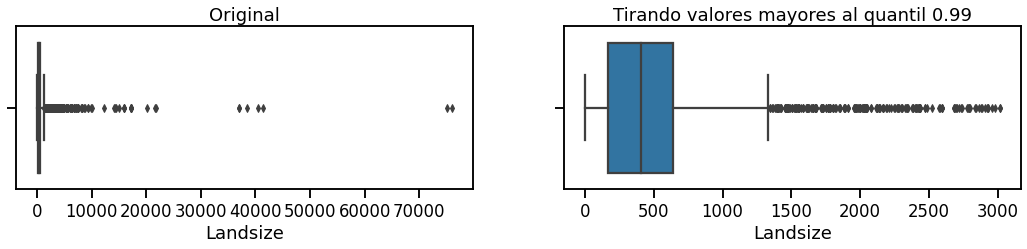

In [75]:
kaggle_co = clean_outliers(kaggle, "Price", show=True) #elimino los valores extremos segun iqr

# ahora elimino para que queden solo los valores menores al percentil 99 en BuildingArea

kaggle_co = clean_outliers_max_q(kaggle_co, "BuildingArea", 0.99, show=True)
kaggle_co = clean_outliers_max_q(kaggle_co, "Landsize", 0.99, show=True)
#seaborn.histplot(kaggle.BuildingArea)

Columna Rooms:
Maximo:5.0
	Se eliminaron 69 registros de 12773
Columna Bedroom2:
Maximo:5.0
	Se eliminaron 5 registros de 12704
Columna Bathroom:
Maximo:3.0
	Se eliminaron 43 registros de 12699


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Columna Car:
Maximo:4.0
	Se eliminaron 116 registros de 12656
Columna YearBuilt:
Minimo:1882.5
	Se eliminaron 76 registros de 12540


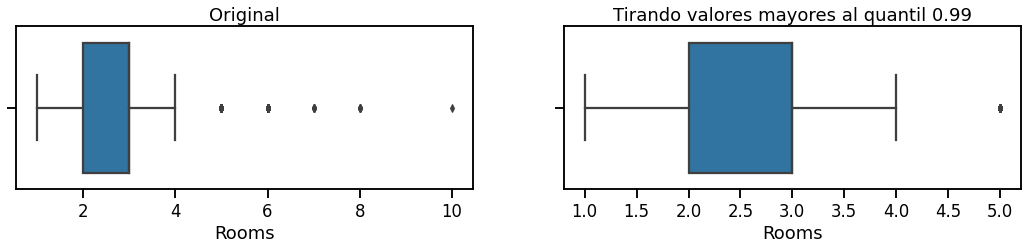

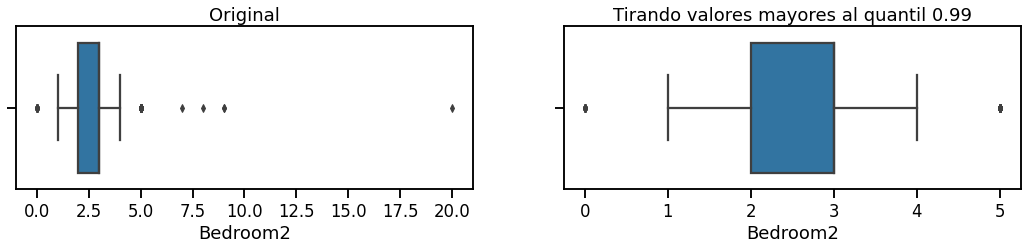

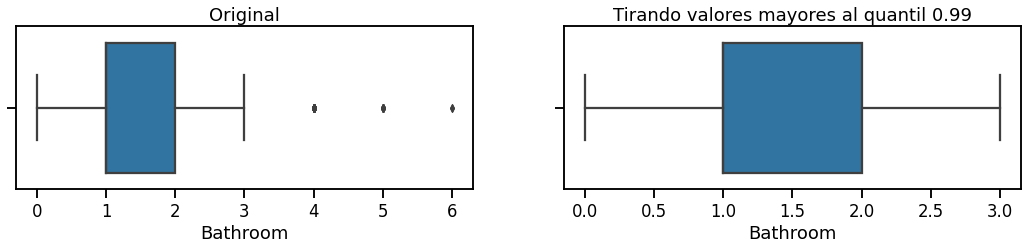

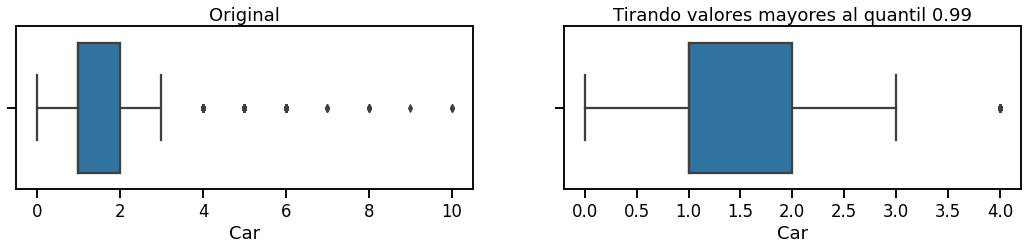

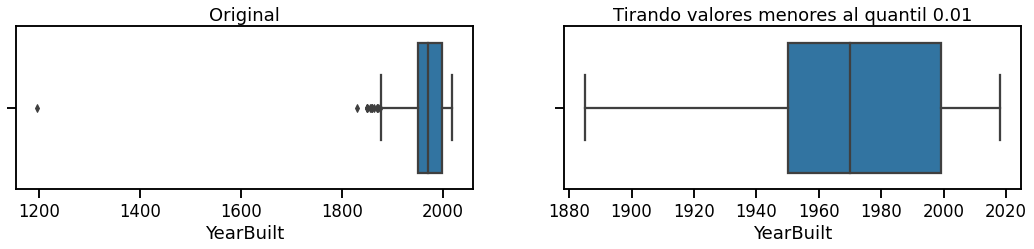

In [76]:

kaggle_co = clean_outliers_max_q(kaggle_co, "Rooms", 0.99, show=True)
kaggle_co = clean_outliers_max_q(kaggle_co, "Bedroom2", 0.99, show=True)
kaggle_co = clean_outliers_max_q(kaggle_co, "Bathroom", 0.99, show=True)
kaggle_co = clean_outliers_max_q(kaggle_co, "Car", 0.99, show=True)
kaggle_co = clean_outliers_min_q(kaggle_co, "YearBuilt", 0.01, show=True)

In [77]:
kaggle.BuildingArea.count()

7130

In [78]:
kaggle_co.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,12464.000000,1.246400e+04,12464.000000,12464.000000,12464.000000,12464.000000,12409.000000,12464.000000,6468.000000,7475.000000,12464.000000,12464.000000
mean,2.856707,9.749646e+05,10.240380,3103.628370,2.833841,1.463495,1.534451,424.527680,131.176647,1966.357057,-37.807600,144.993737
std,0.885215,4.496808e+05,5.860109,90.728728,0.884617,0.598843,0.841555,351.914237,60.297136,34.570688,0.079873,0.104980
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1885.000000,-38.174880,144.431810
25%,2.000000,6.350000e+05,6.300000,3044.000000,2.000000,1.000000,1.000000,163.000000,90.000000,1950.000000,-37.856600,144.926100
50%,3.000000,8.750000e+05,9.400000,3081.000000,3.000000,1.000000,1.000000,400.000000,121.000000,1970.000000,-37.798650,144.998900
75%,3.000000,1.260000e+06,13.000000,3147.000000,3.000000,2.000000,2.000000,631.000000,161.000000,1999.000000,-37.753500,145.057325
max,5.000000,2.350000e+06,47.400000,3977.000000,5.000000,3.000000,4.000000,3014.000000,419.000000,2018.000000,-37.408530,145.526350


##2.2: Información adicional

###2.2.1) Información del entorno del dataset de AirBnB

In [79]:
# Load the AirBnB dataset with interesting columns    
#como hay que agregar informacion del entorno, solo consideramos relevantes
# price y zipcode

interesting_cols = [
  'zipcode', 'price'
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)
airbnb_df[:3]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,zipcode,price
0,3105,60
1,3057,35
2,3182,159


In [80]:
#ANA: esto no se para que se hace, creo que el tipo de zipcode deberia
#quedar como int para ser coherentes con eje_1
airbnb_df["zipcode"] = pd.to_numeric(airbnb_df["zipcode"], errors='coerce')
airbnb_df["price"] = pd.to_numeric(airbnb_df["price"], errors='coerce')
airbnb_df['zipcode'].dtype


dtype('float64')

Filtramos zipcodes con pocos valores ya que no aportarán información relevante.

In [89]:
zc_q = airbnb_df.groupby(["zipcode"]).price.count().quantile(0.15)
zc_q

5.0

Como el 85% de los zipcodes tienen 5 o mas datos de precio, usamos esa cantidad para definir cuando un zipcode tiene suficientes precios asociados para aportar información relevante del entorno. 

In [83]:
df_temp = airbnb_df.groupby('zipcode').price.count()
zip_codes = df_temp[df_temp > zc_q].index.tolist()
zip_codes
#quedo como float64 habria que pasarlo a int?

[3000.0,
 3002.0,
 3003.0,
 3004.0,
 3006.0,
 3008.0,
 3011.0,
 3012.0,
 3013.0,
 3015.0,
 3016.0,
 3018.0,
 3019.0,
 3020.0,
 3021.0,
 3023.0,
 3024.0,
 3025.0,
 3027.0,
 3028.0,
 3029.0,
 3030.0,
 3031.0,
 3032.0,
 3033.0,
 3037.0,
 3039.0,
 3040.0,
 3042.0,
 3043.0,
 3044.0,
 3046.0,
 3047.0,
 3049.0,
 3051.0,
 3052.0,
 3053.0,
 3054.0,
 3055.0,
 3056.0,
 3057.0,
 3058.0,
 3059.0,
 3064.0,
 3065.0,
 3066.0,
 3067.0,
 3068.0,
 3070.0,
 3071.0,
 3072.0,
 3073.0,
 3074.0,
 3076.0,
 3078.0,
 3079.0,
 3081.0,
 3082.0,
 3083.0,
 3084.0,
 3088.0,
 3095.0,
 3097.0,
 3101.0,
 3102.0,
 3103.0,
 3104.0,
 3105.0,
 3106.0,
 3107.0,
 3108.0,
 3109.0,
 3113.0,
 3116.0,
 3121.0,
 3122.0,
 3123.0,
 3124.0,
 3125.0,
 3126.0,
 3127.0,
 3128.0,
 3129.0,
 3130.0,
 3131.0,
 3132.0,
 3133.0,
 3134.0,
 3135.0,
 3136.0,
 3138.0,
 3139.0,
 3140.0,
 3141.0,
 3142.0,
 3143.0,
 3144.0,
 3145.0,
 3146.0,
 3147.0,
 3148.0,
 3149.0,
 3150.0,
 3151.0,
 3152.0,
 3153.0,
 3155.0,
 3156.0,
 3158.0,
 3159.0,
 3160.0,
 

In [84]:
zipcode_prices = airbnb_df.loc[airbnb_df['zipcode'].isin(zip_codes)].groupby(["zipcode"]).median()
zipcode_prices.columns = ['environment_price']
zipcode_prices

,environment_price
zipcode,
3000.0,129.0
3002.0,130.0
3003.0,120.0
3004.0,130.0
3006.0,150.0
...,...
3805.0,150.0
3806.0,84.0
3809.0,64.5


###2.2.2) Unir por zipcode

In [85]:
kaggle_df[:3].columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [86]:
#ANA: entiendo que acá tambien debemos quedarnos con las columnas relevanes y eliminar:
# 'Address', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'CouncilArea'

kaggle_environment = kaggle_df.join(zipcode_prices, lsuffix='_caller', rsuffix='_other', on='Postcode')
kaggle_environment[-3:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,environment_price
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,180.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,180.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,108.5


### 2.2.3) Otras variables para combinar información de ambos datasets:

**Latitud y longitud**: para combinar por cercanía (habría que definir un rango de valores, por ejemplo una distancia radial) y reconocer características comunes por zona geográfica en ese entorno. Esta combinación nos serviría para comparar y estimar el precio de las propiedades "parecidas" que están dentro de ese entorno.

Las características comunes por zona geográfica podrían ser: acceso a transporte público, acceso a los servicios públicos en general (redes cloacales, gas natural de red, agua potable) cercanía al centro, distancia a la costanera, etc.
Con propiedades "parecidas" nos referimos a propiedades que tienen condiciones similares, como ser, metros cuadrados cubiertos, cantidad de habitaciones o baños.

Puede no ser un método adecuado porque habría que resolver las intersecciones entre esos entornos.

Si contamos con expertos que nos asesoren con las características comunes por entorno, y si para cada propiedad con ciertas características pudiéramos conocer las N propiedades similares más cercanas, podría ayudar a estimar el precio de una propiedad dada.


**Suburb** en Kaggle ¿es suburb o neighbourhood en AirBnB?

Para poder combinar estas variables deberíamos poder reconocer cuándo dos entradas son equivalentes por zona mencionada (vecindario, barrio, suburbio) para que la comparación sea efectiva y los datos agregados sean relevantes para tal propiedad.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [87]:
from google.colab import files
kaggle_environment.to_csv('kaggle_env.csv', index=False)
files.download('kaggle_env.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)